# 앙상블 
- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법


## RandomForest 
: 의사결정트리 bagging(단일 모델 조합)해서 예측을 실행하는 모델

In [33]:
from sklearn import datasets
import numpy as np
np.random.seed(5)

In [34]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [35]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [36]:
# 의사결정 나무를 이용한 교차 검증 10번 실시
from sklearn import tree
from sklearn.model_selection import cross_val_score

cv_scores = []
for i in range(10):
    scores = cross_val_score(
        tree.DecisionTreeClassifier(),
        features, 
        labels, 
        cv= 10,
        scoring='accuracy'
    )
    cv_scores.append(scores.mean())

cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

In [37]:
# RandomForest를 이용한 교차검증 10번
from sklearn.ensemble import RandomForestClassifier

cv_scores = []
for i in range(10):
    scores = cross_val_score(
        RandomForestClassifier(),
        features,
        labels,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(scores.mean())

cv_scores

[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

In [38]:
def cross_validation(classifier,features, labels):
    result = []
    for i in range(10):
        scores = cross_val_score(
            classifier,
            features,
            labels,
            cv=10,
            scoring='accuracy'
        )
        result.append(scores.mean())
    return result



In [39]:
# 의사결정 나무
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(),features,labels)
dt_cv_scores

[0.8330509000620733,
 0.8224736188702669,
 0.8268963376784605,
 0.8246710117939168,
 0.825788330229671,
 0.821880819366853,
 0.833584729981378,
 0.8280167597765363,
 0.826340782122905,
 0.8235816263190564]

In [40]:
# RandomForest
rf_cv_scores = cross_validation(RandomForestClassifier(),features,labels)
rf_cv_scores

[0.9504655493482307,
 0.9410117939168219,
 0.9510211049037863,
 0.9549162011173185,
 0.9504469273743016,
 0.9449130974549969,
 0.9510117939168218,
 0.9493513345747981,
 0.9488081936685286,
 0.9471198013656114]

---
# 랜덤포레스트와 의사결정나무의 정확도 시각화

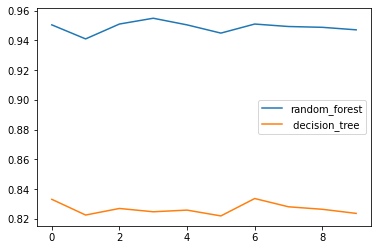

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

cv_list = {'random_forest': rf_cv_scores, ' decision_tree': dt_cv_scores}
df = pd.DataFrame(cv_list)

df.plot()
plt.show()

---
# 보팅(voting) 앙상블
: 단일 모델을 앙상블하여 더나은 예측을 하는 모델 생성


### 단일 모델 정확도 측정

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2)

In [43]:
# 의사결정 나무
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
dtree_score = dtree.score(X_test,y_test)
print("d-tree :",dtree_score)

d-tree : 0.8638888888888889


In [45]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)
print("Knn :",knn_score)

Knn : 0.9805555555555555


In [54]:
# SVM
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train,y_train)
svm_score = svm.score(X_test,y_test)
print("SVM :",svm_score)

SVM : 0.9861111111111112


### 하드 보팅
: 각각의 분류기의 예츠값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식


In [56]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('decision_tree',dtree),('knn',knn),('svm',svm)],
    weights=[1,1,1],
    voting='hard'
).fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.9861111111111112

### 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종결론을 내는 방식

In [55]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('decision_tree',dtree),('knn',knn),('svm',svm)],
    weights=[1,1,1],
    voting='soft'
).fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.9833333333333333